In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as rq
from config import weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create the counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(3)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = rq.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d  %H-%M-%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | havre
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bubaque
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | paraiso
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | mattawa
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | yebaishou
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | olinda
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | but

Processing Record 40 of Set 4 | madimba
Processing Record 41 of Set 4 | waipawa
Processing Record 42 of Set 4 | wyndham
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | apartado
Processing Record 45 of Set 4 | aripuana
Processing Record 46 of Set 4 | joshimath
Processing Record 47 of Set 4 | ashland
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | narrabri
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | popondetta
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | yacuiba
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | hobbs
Processing Record 8 of Set 5 | yuksekova
Processing Record 9 of Set 5 | bouar
Processing Record 10 of Set 5 | bathsheba
Processing Record 11 of Set 5 | merauke
Processing Record 12 of Set 5 | vents

Processing Record 27 of Set 8 | carman
Processing Record 28 of Set 8 | bambous virieux
Processing Record 29 of Set 8 | souris
Processing Record 30 of Set 8 | kloulklubed
Processing Record 31 of Set 8 | makasar
Processing Record 32 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 33 of Set 8 | honningsvag
Processing Record 34 of Set 8 | mitu
Processing Record 35 of Set 8 | uk
City not found. Skipping...
Processing Record 36 of Set 8 | yuanping
Processing Record 37 of Set 8 | aabybro
Processing Record 38 of Set 8 | el transito
Processing Record 39 of Set 8 | kuche
City not found. Skipping...
Processing Record 40 of Set 8 | lere
Processing Record 41 of Set 8 | maldonado
Processing Record 42 of Set 8 | frontera
Processing Record 43 of Set 8 | tawkar
City not found. Skipping...
Processing Record 44 of Set 8 | kushmurun
Processing Record 45 of Set 8 | saint-joseph
Processing Record 46 of Set 8 | souillac
Processing Record 47 of Set 8 | queimados
Processing Record 48 of Set 

Processing Record 9 of Set 12 | porbandar
Processing Record 10 of Set 12 | canyon
Processing Record 11 of Set 12 | waitara
Processing Record 12 of Set 12 | sebastian
Processing Record 13 of Set 12 | kuruman
Processing Record 14 of Set 12 | batagay-alyta
Processing Record 15 of Set 12 | hirara
Processing Record 16 of Set 12 | portobelo
Processing Record 17 of Set 12 | pitimbu
Processing Record 18 of Set 12 | koutiala
Processing Record 19 of Set 12 | salta
Processing Record 20 of Set 12 | grand baie
Processing Record 21 of Set 12 | den helder
Processing Record 22 of Set 12 | zhob
Processing Record 23 of Set 12 | tigzirt
Processing Record 24 of Set 12 | marquette
Processing Record 25 of Set 12 | berlevag
Processing Record 26 of Set 12 | chunhuhub
Processing Record 27 of Set 12 | aleksandrovskiy zavod
Processing Record 28 of Set 12 | san policarpo
Processing Record 29 of Set 12 | otofuke
Processing Record 30 of Set 12 | progreso
Processing Record 31 of Set 12 | urumqi
Processing Record 32 

In [7]:
len(city_data)

566

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-09-08 00-10-00,35.7333,140.8333,75.60,82,77,18.01
1,Kapaa,US,2022-09-08 00-10-00,22.0752,-159.3190,84.52,70,20,17.27
2,Mataura,NZ,2022-09-08 00-10-00,-46.1927,168.8643,50.49,68,76,1.97
3,Bredasdorp,ZA,2022-09-08 00-10-01,-34.5322,20.0403,47.95,94,24,1.57
4,Havre,FR,2022-09-08 00-10-01,49.5833,0.3333,62.37,88,20,10.36
5,Rikitea,PF,2022-09-08 00-10-02,-23.1203,-134.9692,72.68,72,4,23.82
6,Ushuaia,AR,2022-09-08 00-10-02,-54.8000,-68.3000,38.86,65,40,3.44
7,Bubaque,GW,2022-09-08 00-10-03,11.2833,-15.8333,80.91,81,100,7.38
8,Punta Arenas,CL,2022-09-08 00-10-04,-53.1500,-70.9167,39.22,75,100,17.27
9,Saskylakh,RU,2022-09-08 00-10-04,71.9167,114.0833,36.99,79,98,9.42


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

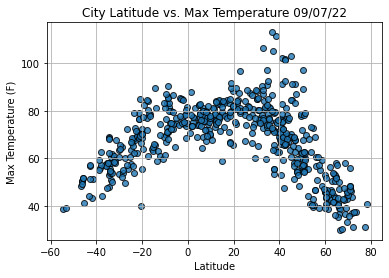

In [11]:
# Import time module (Done at top).

# Build the scatter plot for latittude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

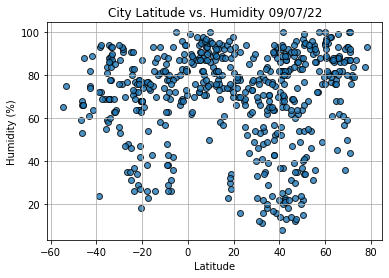

In [12]:
# Import time module (Done at top).

# Build the scatter plot for latittude vs. max temperature.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

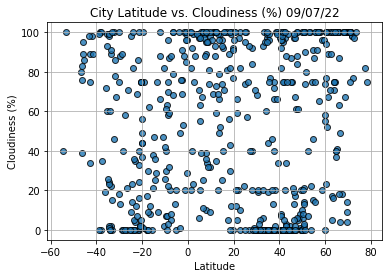

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

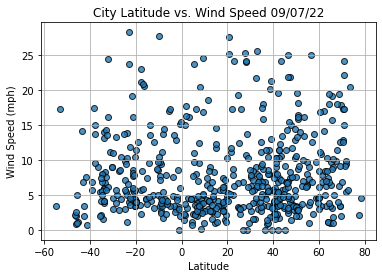

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
print("change")

change
